In [6]:
!pip install -Uqq fastai duckduckgo_search 

In [10]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *

def search_images(temp, max_images=300):
    print(f"Searching Images For {temp}")
    return L(ddg_images(temp,max_results=max_images)).itemgot('image')

In [11]:
pwd

'C:\\Users\\Samarth\\Documents'

In [12]:
cd Documents

[WinError 2] The system cannot find the file specified: 'Documents'
C:\Users\Samarth\Documents


In [14]:
find = 'Naruto Uzumaki', 'Kakashi Hatake', 'Sasuke Uchia', 'Sakura Haruno'
path = Path('Team7_Naruto/team7')
from time import sleep
for i in find:
    destination = path/i
    destination.mkdir(exist_ok=True, parents=True)
    download_images(destination, urls=search_images(f'{i} naruto anime images'))
    sleep(10)
    resize_images(path/i, max_size=400, destination = path/i)

Searching Images For Naruto Uzumaki naruto anime images
Searching Images For Kakashi Hatake naruto anime images
Searching Images For Sasuke Uchia naruto anime images
Searching Images For Sakura Haruno naruto anime images


In [15]:
failed_images=verify_images(get_image_files(path))
failed_images.map(Path.unlink)
len(failed_images)

4

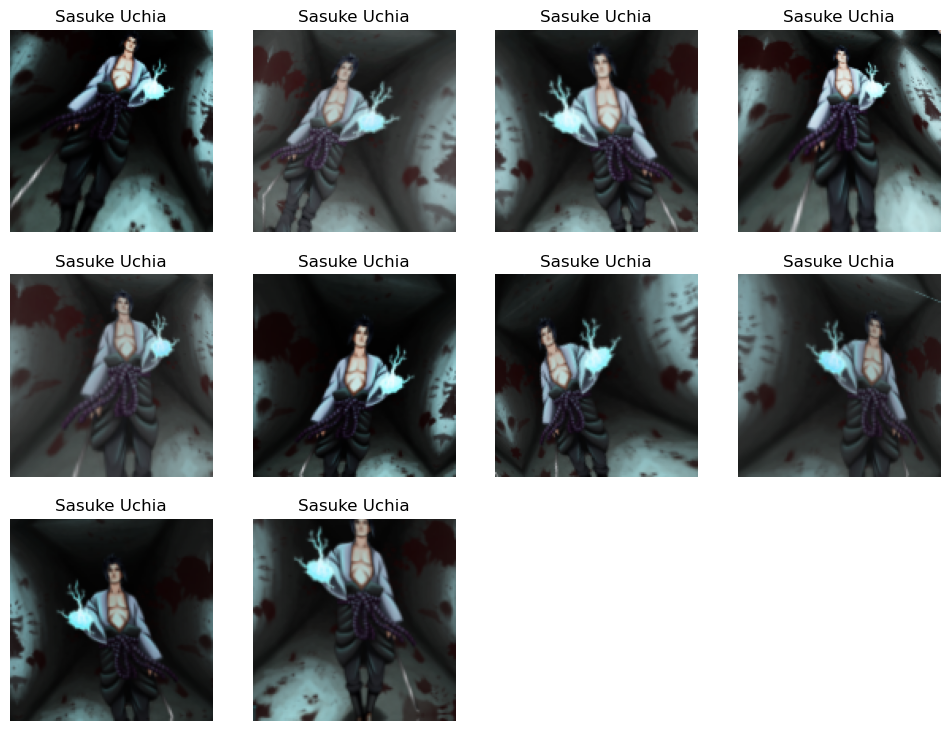

In [16]:
team7 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = [Resize(128)],
    batch_tfms = aug_transforms(mult=2)
).dataloaders(path,bs=32)

team7.show_batch(max_n=10, unique = True)

In [17]:
learn = vision_learner(team7,resnet18,metrics=error_rate)
learn.fine_tune(5)

C:\Users\Samarth\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Samarth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.286175,0.554332,0.168519,01:58


C:\Users\Samarth\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.713416,0.293739,0.098148,02:14
1,0.546253,0.195044,0.053704,02:16
2,0.379270,0.155643,0.053704,02:15
3,0.320217,0.120523,0.035185,02:16
4,0.246993,0.097718,0.038889,02:16


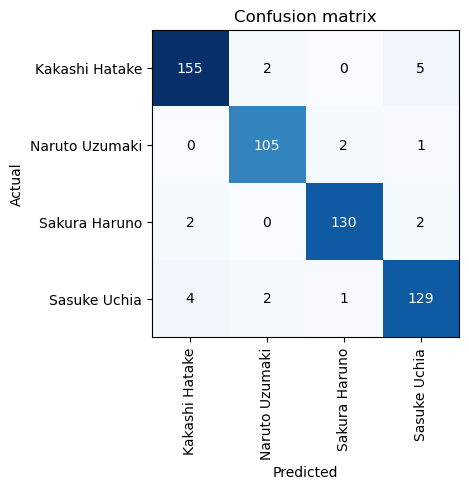

In [18]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

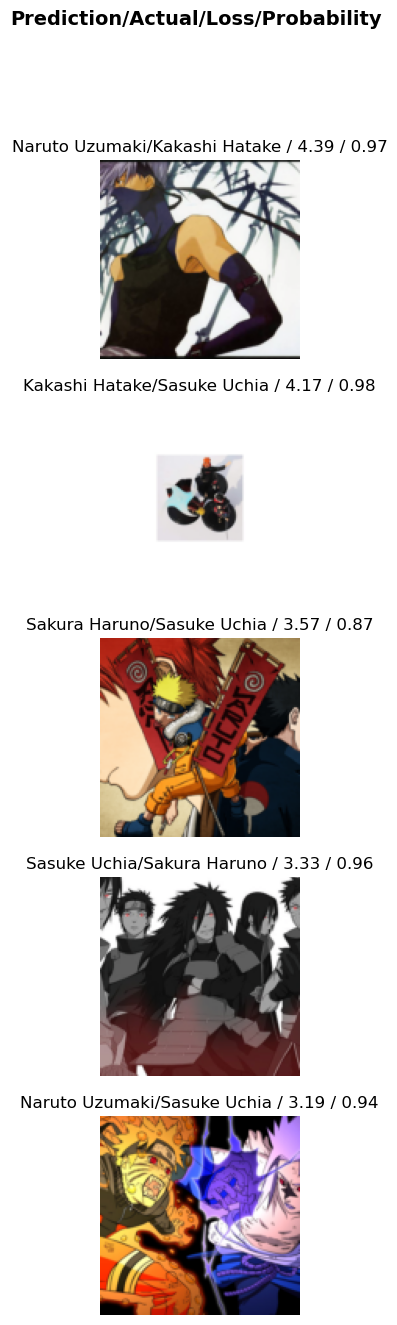

In [19]:
interpret.plot_top_losses(5,nrows=5)

In [20]:
from fastai.vision.widgets import *
clean = ImageClassifierCleaner(learn)
clean

In [25]:
for f in clean.delete():
    clean.fns[f].unlink()

In [26]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 081D-49B4

 Directory of C:\Users\Samarth\Documents

29-04-2023  12:05    <DIR>          ${POSE_ROOT}
02-05-2023  05:54    <DIR>          .
02-05-2023  05:54    <DIR>          ..
27-04-2023  05:54    <DIR>          .ipynb_checkpoints
29-04-2023  11:35    <DIR>          3Dcode
20-04-2023  18:02    <DIR>          Cats_and_Dogs
25-04-2023  03:08    <DIR>          Dogs_and_Cats
15-04-2023  07:42    <DIR>          FeedbackHub
19-04-2023  15:51            38,018 icy.jpg
18-04-2023  19:25    <DIR>          is_that_a_panda
27-04-2023  20:01             5,684 kakashi.jpg
25-04-2023  03:25    <DIR>          models
18-04-2023  18:56            85,109 moon.jpg
27-04-2023  20:03           125,961 oturan.jpg
18-04-2023  19:46         3,649,826 Panda.ipynb
18-04-2023  15:05         1,040,728 panda.jpg
30-04-2023  14:30    <DIR>          PandaLib
21-04-2023  06:29    <DIR>          Python
15-04-2023  16:13    <DIR>          Python Scripts
21-03

In [27]:
categories = ('Kakashi Hatake','Naruto Uzumaki','Sakura Haruno','Sasuke Uchia')
def predict_this(img):
    who_is_this,_,probs = learn.predict(PILImage.create(img))
    return dict(zip(categories,map(float,probs)))

In [31]:
who_is_this,_,probs = learn.predict(PILImage.create('kakashi.jpg'))
print(f"This is : {who_is_this}.")
print(f"{probs[0]}")

This is : Kakashi Hatake.
0.9999997615814209


In [32]:
who_is_this,_,probs = learn.predict(PILImage.create('oturan.jpg'))
print(f"This is : {who_is_this}.")
print(f"{probs[1]}")

This is : Naruto Uzumaki.
0.9983727335929871


In [4]:
pip install gradio

     --------------------------------------- 17.3/17.3 MB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 75.3/75.3 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 224.5/224.5 kB ? eta 0:00:00
     ------------------------------------- 813.6/813.6 kB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB ? eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB ? eta 0:00:00
     ------------------------------------- 286.7/286.7 kB 18.4 MB/s eta 0:00:00
     ------------------------------------- 319.8/319.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 196.2/196.2 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------

In [5]:
import gradio as gr

In [35]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['oturan.jpg','kakashi.jpg']

intf = gr.Interface(fn=predict_this, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
